# Corso di Probabilità e Statistica - Distribuzioni multivariate

In questo capitolo discutiamo delle distribuzioni multivariate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats # Statistica
import seaborn as sns # Grafica avanzata 

Definiamo un set di coppie di numeri random Gaussiani:
$$ p(x,y) = \frac{1}{\sqrt{1-\rho^2}2\pi s_x s_y} \exp\left(-\frac{1}{2(1-\rho^2} \left(\frac{x^2}{s_x^2}+\frac{y^2}{s_y^2} -2\rho \frac{xy}{s_x s_y} \right)\right)$$

per cui i momenti sono
$$\langle x \rangle =\langle y \rangle=0$$ 
$$\langle x^2 \rangle =s_x^2$$ 
$$\langle y^2 \rangle =s_y^2$$ 
$$\langle xy \rangle =\rho s_x s_y$$

https://docs.scipy.org/doc//numpy-1.15.0/reference/generated/numpy.random.multivariate_normal.html

In [18]:
# definiamo medie e covarianza
mu = [0, 0] #medie nulle
rho=.5 #coefficiente di correlazione
sx=1
sy=2
cov = [[sx**2, rho*sx*sy], [rho*sx*sy, sy**2]] #covarianza
N=1000 #numero di punti

In [19]:
# generiamo N valori x,y 
x, y = np.random.multivariate_normal(mu, cov, N).T

In [20]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})

**Scatter plot**

Text(0, 0.5, 'Y')

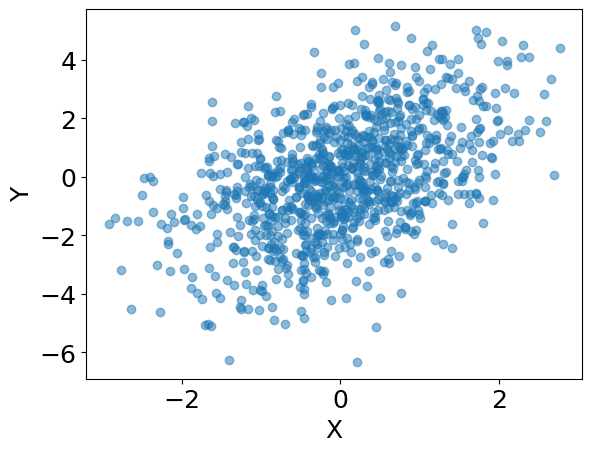

In [21]:
plt.scatter(x, y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')

**Hexbin plot**

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hexbin.html

Text(0, 0.5, 'Y')

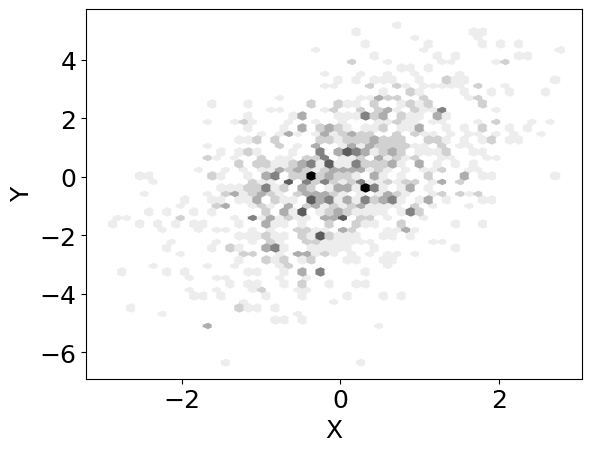

In [22]:
plt.hexbin(x, y,gridsize=50, cmap='Greys')
plt.xlabel('X')
plt.ylabel('Y')

**Contour plots**

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

Text(0, 0.5, 'Y')

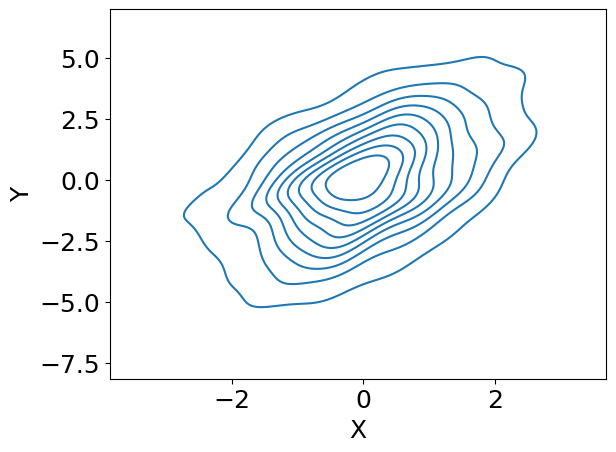

In [23]:
# contorni linee
ax=sns.kdeplot(x=x, y=y)
ax.set_xlabel('X')
ax.set_ylabel('Y')

Text(0, 0.5, 'Y')

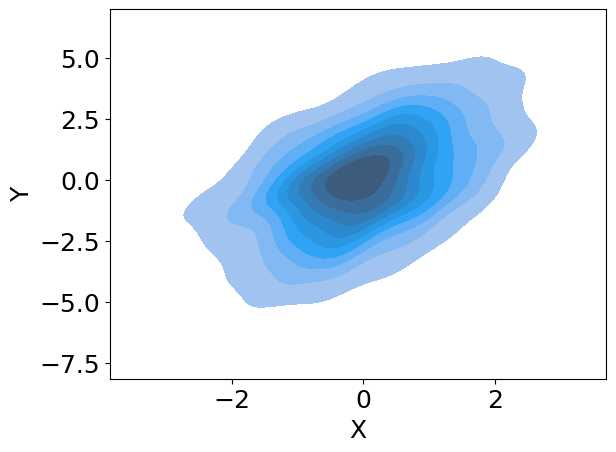

In [24]:
# contorni colori
ax=sns.kdeplot(x=x, y=y, fill=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')

Text(0, 0.5, 'Y')

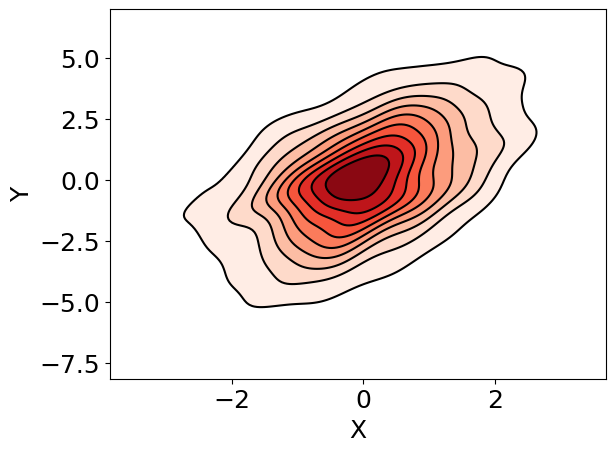

In [25]:
# linee e colori
ax=sns.kdeplot(x=x, y=y, fill="True", cmap="Reds")
sns.kdeplot(x=x,y=y, color="Black", ax=ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')

Text(0, 0.5, 'Y')

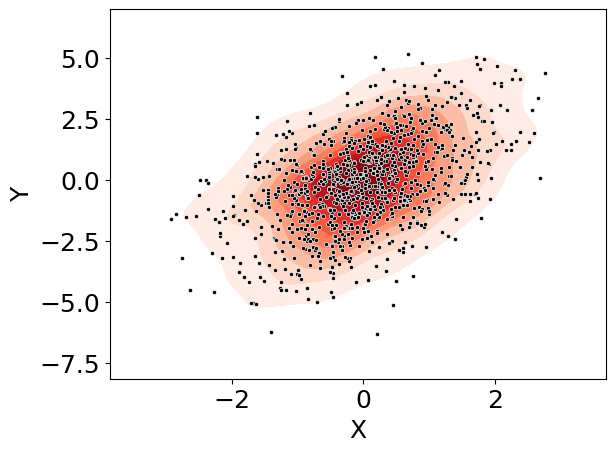

In [26]:
# punti e colori
ax=sns.kdeplot(x=x, y=y, fill="True", cmap="Reds")
sns.scatterplot(x=x,y=y, color="Black", marker=".",ax=ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')

**nota**: scegliere i markers: https://matplotlib.org/3.3.1/api/markers_api.html

**Joint plots**

http://seaborn.pydata.org/generated/seaborn.jointplot.html

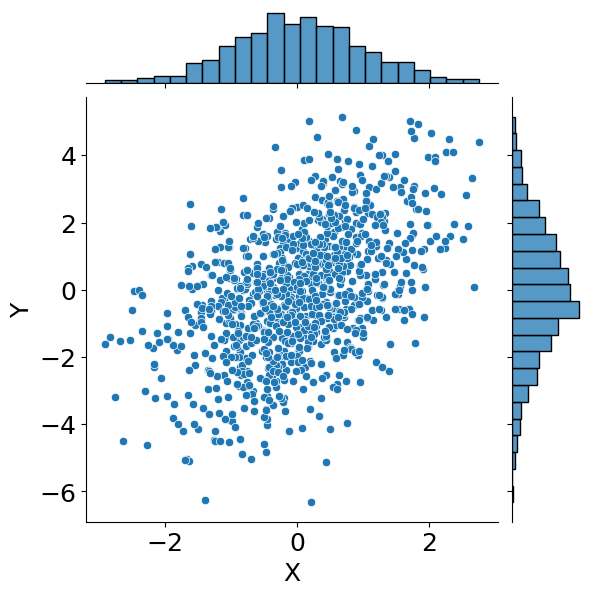

In [27]:
# scatter
ax=sns.jointplot(x=x, y=y)
ax.set_axis_labels("X","Y")


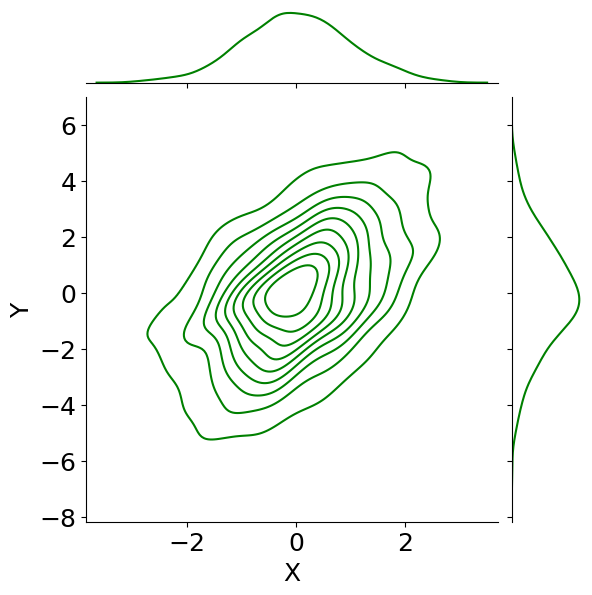

In [28]:
# con kde
ax=sns.jointplot(x=x, y=y , kind="kde", color="g")
ax.set_axis_labels("X","Y")

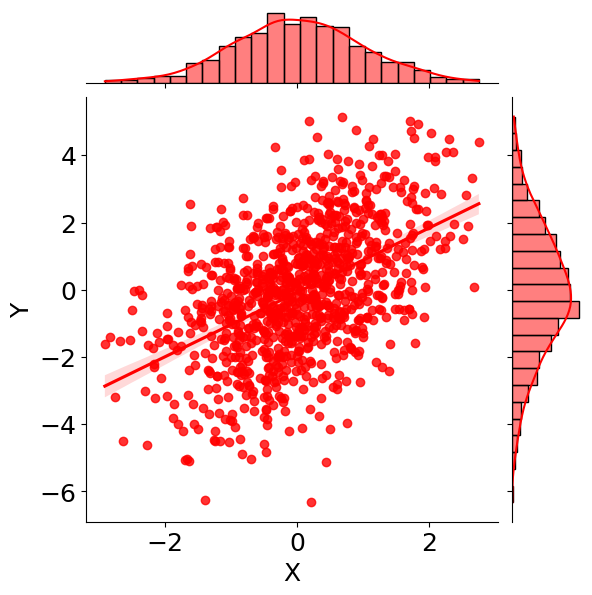

In [29]:
# con regressione
ax=sns.jointplot(x=x, y=y , kind="reg", color="r")
ax.set_axis_labels("X","Y")

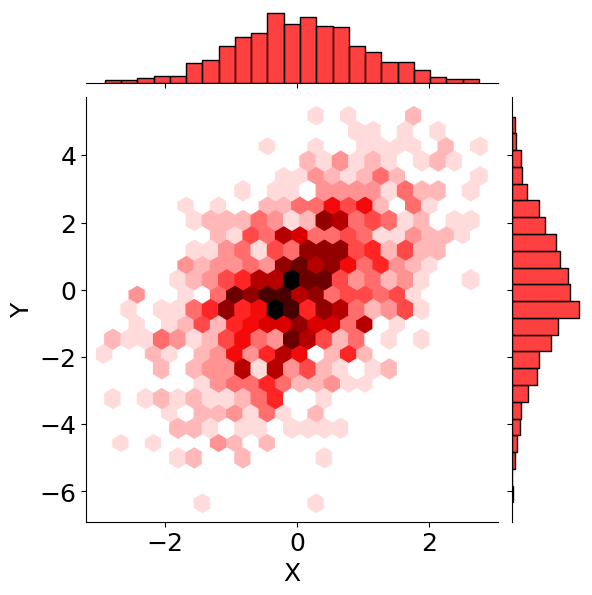

In [31]:
# con hexbin
ax=sns.jointplot(x=x, y=y , kind="hex", color="r")
ax.set_axis_labels("X","Y")

**Esercizio**

- Generare delle variabili casuali $x,y$ correlate come nell'esercizio precedente. 

- Eseguire una trasformazione delle variabili in modo da renderle scorrelate $x' = x \cos \phi + y \sin \phi$ e $y'=-x \sin \phi + y\cos \phi$, dove $\tan 2\phi = 2\rho s_x s_y /(s_x^2-s_y^2)$.

- Verificare graficamente che nel piano $(x',y')$ la distribuzione e descritta da un ellissoide con gli assi paralleli agli assi cartesiani

In [34]:
phi=.5*np.arctan(2*rho*sx*sy/(sx**2-sy**2))

In [36]:
phi

-0.29400130177378375

In [38]:
xp=x*np.cos(phi)+y*np.sin(phi)
yp=-x*np.sin(phi)+y*np.cos(phi)

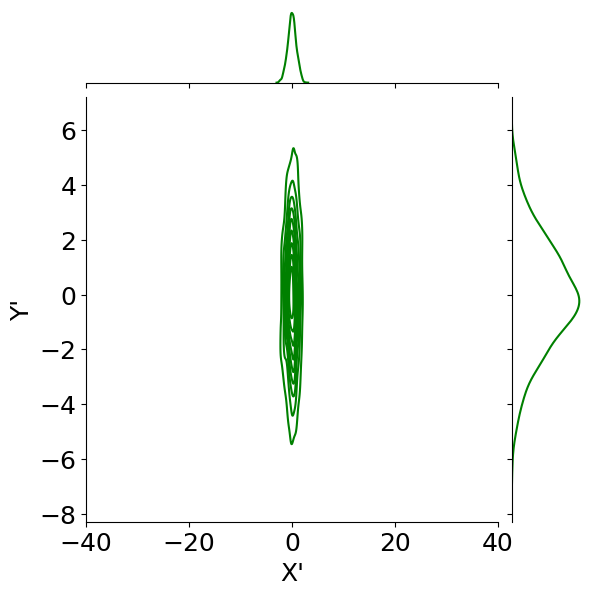

In [42]:
# con kde
ax=sns.jointplot(x=xp, y=yp , kind="kde", color="g", xlim=[-40,40])
ax.set_axis_labels("X'","Y'")